In [141]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd
import numpy as np
import os, sys
import h5py

from sklearn.metrics import precision_recall_fscore_support

os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [142]:
pwd

'/home/users/cdonoso/astromer/ASTROMER/presentation/notebooks'

In [143]:
def load_embeddings(source):
    file = open(source, 'rb')
    hf = h5py.File(file)
    att = hf['att'][()]
    x = hf['x'][()]
    t = hf['t'][()]
    lc = np.concatenate([t, x], 2)
    y = hf['y'][()]
    l = hf['id'][()]
    m = 1. - hf['m'][()]
    return att, y, l, m, lc

In [144]:
def get_prediction(data, folder, name):
    x, y, l, m, lc = load_embeddings(os.path.join(data, 'test.h5'))
    
    if name == 'lstm':
        x_test = [lc, m]
        print('lstm: ',x_test[0].shape)
    if name == 'lstm_att':
        x_test = [x, m]
        print('lstm_att: ',x_test[0].shape)
    if name == 'mlp_att':
        x_test = np.sum(x*m, 1)/tf.reduce_sum(m)
        print('mlp_att: ',x_test.shape)
        
    model = tf.keras.models.load_model(os.path.join(folder, name, 'model'))
    y_pred = model.predict(x_test)
    y_pred = tf.argmax(y_pred, 1)
    
    return y, y_pred

In [148]:
exp_name = 'alcock'
fold_n = 1
results = []
for exp in ['{}_20'.format(exp_name), 
            '{}_50'.format(exp_name), 
            '{}_100'.format(exp_name),
            '{}_500'.format(exp_name),
            '{}'.format(exp_name)]:#
    
    for model_name in ['lstm', 'lstm_att', 'mlp_att']:
        y, y_pred = get_prediction('../../encoded/{}/fold_{}'.format(exp, fold_n), 
                                   '../../experiments/{}/fold_{}'.format(exp, fold_n), 
                                   model_name)

        prec, reca, f1, _ = precision_recall_fscore_support(y, y_pred, average='macro')
        
        results.append([exp, model_name, f1, prec, reca])

lstm:  (100, 200, 2)


2021-11-12 11:53:04.169062: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:53:05.283501: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:53:05.856743: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:53:06.232632: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:53:06.244841: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_sh

lstm_att:  (100, 200, 256)


2021-11-12 11:53:12.826901: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:53:12.839195: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:53:13.197255: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:53:13.209545: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:53:14.536909: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_sh

mlp_att:  (100, 256)
lstm:  (232, 200, 2)


2021-11-12 11:53:23.301809: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:53:23.471002: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:53:23.536906: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:53:23.549260: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:53:24.587287: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _ou

lstm_att:  (232, 200, 256)


2021-11-12 11:53:33.861062: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:53:33.873509: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:53:34.012148: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:53:34.024277: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:53:35.576060: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_sh

mlp_att:  (232, 256)
lstm:  (479, 200, 2)


2021-11-12 11:53:45.229177: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:53:45.648149: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:53:46.228454: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:53:47.550327: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:53:47.708761: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _ou

lstm_att:  (479, 200, 256)


2021-11-12 11:53:55.459661: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:53:55.640703: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:53:55.678794: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:53:57.252001: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:53:57.910450: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but 

mlp_att:  (479, 256)
lstm:  (2433, 200, 2)


2021-11-12 11:54:07.338765: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:54:07.955918: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:54:07.968324: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:54:08.383321: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:54:08.784964: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _ou

lstm_att:  (2433, 200, 256)


2021-11-12 11:54:24.586428: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:54:26.290055: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:54:26.346339: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:54:26.358435: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:54:26.596912: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _ou

mlp_att:  (2433, 256)
lstm:  (2421, 200, 2)


2021-11-12 11:54:44.452102: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:54:44.563663: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:54:44.709908: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:54:45.244297: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:54:45.256700: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _output_sh

lstm_att:  (2421, 200, 256)


2021-11-12 11:55:00.260905: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:55:00.311580: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:55:00.689451: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:55:00.773107: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2021-11-12 11:55:00.785339: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond' has 5 outputs but the _ou

mlp_att:  (2421, 256)


In [146]:
df_results = pd.DataFrame(results, columns=['exp', 'model', 'f1', 'recall', 'precision'])
df_results.to_csv('../../experiments/results_fold_1.csv', index=False)

lstm
lstm_att
mlp_att


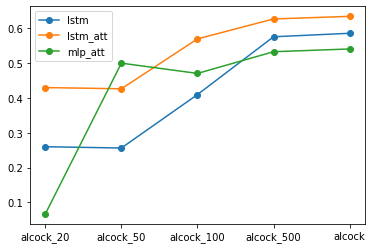

In [147]:
for exp, group in df_results.groupby('model'):
    print(exp)
    xrange = range(len(group['exp']))
    plt.plot(xrange, group['f1'], marker='o',label=exp)
    plt.xticks(xrange, group['exp'])
plt.legend()
plt.show()

In [48]:
fold_0 = pd.read_csv('../../experiments/results_fold_0.csv')
fold_1 = pd.read_csv('../../experiments/results_fold_1.csv')
fold_2 = pd.read_csv('../../experiments/results_fold_2.csv')

In [133]:
all_folds = pd.concat([fold_0[fold_2['exp']=='alcock_100'].iloc[:, 1:],
fold_1[fold_2['exp']=='alcock_100'].iloc[:, 1:],
fold_2[fold_2['exp']=='alcock_100'].iloc[:, 1:]])

In [134]:
all_folds_mean = all_folds.groupby('model').mean()
all_folds_std = all_folds.groupby('model').std()
all_folds_table = all_folds_mean.round(2).astype(str) + '+-' +all_folds_std.round(2).astype(str)
for k, row in all_folds_table.reset_index().iterrows():
    print(' & '.join(row.values)+' \\\ \hline')

lstm & 0.37+-0.12 & 0.38+-0.14 & 0.4+-0.09 \\ \hline
lstm_att & 0.58+-0.01 & 0.58+-0.01 & 0.58+-0.01 \\ \hline
mlp_att & 0.48+-0.02 & 0.49+-0.02 & 0.48+-0.02 \\ \hline


In [135]:
from scipy import stats

In [137]:
f = all_folds_mean.reset_index()
f2 = all_folds_std.reset_index()

rvs1 = stats.norm.rvs(loc=f[f['model']=='lstm']['f1'].values[0], 
                        scale=f2[f2['model']=='lstm']['f1'].values[0], 
                        size=3)

rvs2 = stats.norm.rvs(loc=f[f['model']=='lstm_att']['f1'].values[0], 
                        scale=f2[f2['model']=='mlp_att']['f1'].values[0], 
                        size=3)
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=-3.321626910374951, pvalue=0.029333931948284)

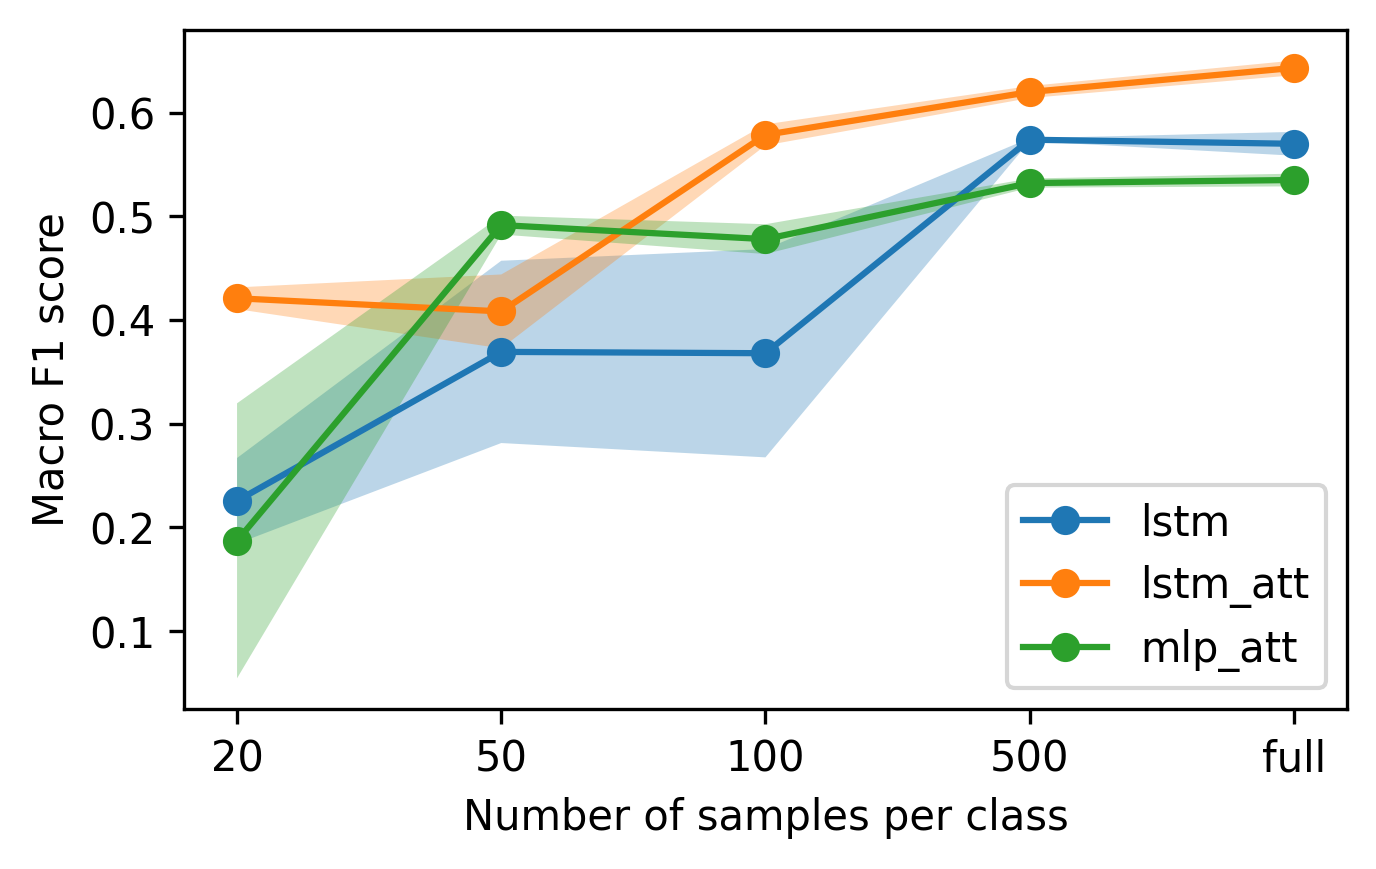

In [132]:
plt.figure(figsize=(5,3), dpi=300)
for (exp0, g0), (exp1, g1), (exp2, g2) in zip(fold_0.groupby('model'), fold_1.groupby('model'), fold_2.groupby('model')):
    
    f1_mean = np.mean([g0['f1'], g1['f1'], g2['f1']], 0)
    f1_std = np.std([g0['f1'], g1['f1'], g2['f1']], 0)
    
    xrange = range(len(g0['exp']))
    plt.plot(xrange, f1_mean, marker='o',label=exp0)
    plt.fill_between(xrange, f1_mean+f1_std, f1_mean-f1_std, alpha=0.3)
    plt.xticks(xrange, [x.split('_')[-1] for x in g0['exp']][:-1]+['full'])
    
plt.ylabel('Macro F1 score')
plt.xlabel('Number of samples per class')
plt.legend()
plt.show()